In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tabular-playground-series-feb-2021/sample_submission.csv
/kaggle/input/tabular-playground-series-feb-2021/train.csv
/kaggle/input/tabular-playground-series-feb-2021/test.csv


In [2]:
train = pd.read_csv("/kaggle/input/tabular-playground-series-feb-2021/train.csv")
test = pd.read_csv("/kaggle/input/tabular-playground-series-feb-2021/test.csv")

In [3]:
train.head()

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target
0,1,A,B,A,A,B,D,A,E,C,...,0.881122,0.421650,0.741413,0.895799,0.802461,0.724417,0.701915,0.877618,0.719903,6.994023
1,2,B,A,A,A,B,B,A,E,A,...,0.440011,0.346230,0.278495,0.593413,0.546056,0.613252,0.741289,0.326679,0.808464,8.071256
2,3,A,A,A,C,B,D,A,B,C,...,0.914155,0.369602,0.832564,0.865620,0.825251,0.264104,0.695561,0.869133,0.828352,5.760456
3,4,A,A,A,C,B,D,A,E,G,...,0.934138,0.578930,0.407313,0.868099,0.794402,0.494269,0.698125,0.809799,0.614766,7.806457
4,6,A,B,A,A,B,B,A,E,C,...,0.382600,0.705940,0.325193,0.440967,0.462146,0.724447,0.683073,0.343457,0.297743,6.868974


In [4]:
train.describe()

,id,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target
count,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000
mean,250018.576947,0.524634,0.506649,0.444115,0.446214,0.455471,0.508337,0.478345,0.455904,0.459321,0.526899,0.504943,0.529938,0.524549,0.503349,7.456260
std,144450.150010,0.204875,0.235269,0.200089,0.238669,0.200695,0.231612,0.192432,0.204493,0.220642,0.204025,0.201549,0.230860,0.220892,0.225218,0.887295
min,1.000000,-0.093505,-0.055105,-0.060274,0.134760,0.189216,-0.087247,0.043953,0.208703,0.004041,0.073040,0.059644,0.064161,-0.005600,0.158121,0.000000
25%,124772.500000,0.370451,0.352307,0.314121,0.214572,0.279853,0.338747,0.339896,0.278041,0.308655,0.361957,0.338898,0.316662,0.332143,0.291289,6.798341
50%,250002.500000,0.492208,0.615156,0.457271,0.377823,0.411351,0.441384,0.410090,0.360736,0.425801,0.488867,0.519855,0.558827,0.407365,0.433909,7.496503
75%,375226.500000,0.654793,0.688150,0.554835,0.719758,0.621808,0.709515,0.604246,0.639388,0.541525,0.752765,0.672809,0.720381,0.732431,0.730870,8.161166
max,499999.000000,1.052666,0.851746,1.017689,1.006469,0.994050,1.044433,1.093312,1.036541,1.014156,0.972091,1.029773,1.038049,0.961370,0.873579,10.309208


In [5]:
train.isna().sum()

id        0
cat0      0
cat1      0
cat2      0
cat3      0
cat4      0
cat5      0
cat6      0
cat7      0
cat8      0
cat9      0
cont0     0
cont1     0
cont2     0
cont3     0
cont4     0
cont5     0
cont6     0
cont7     0
cont8     0
cont9     0
cont10    0
cont11    0
cont12    0
cont13    0
target    0
dtype: int64

In [7]:
train.shape,test.shape

((300000, 26), (200000, 25))

In [30]:
#getting target variable separately to see whether its normally distributed
target = train['target']

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


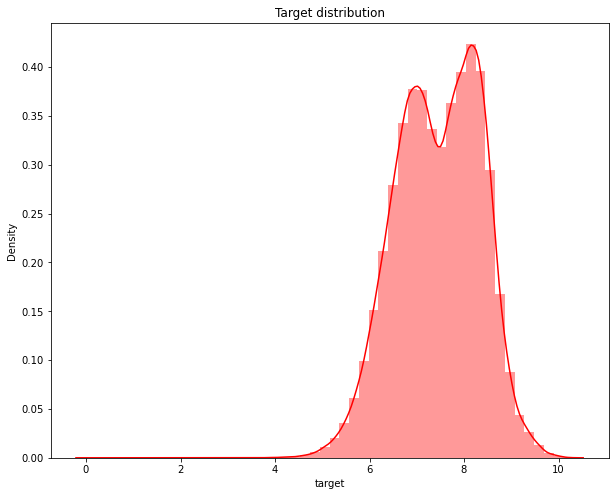

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.subplots(figsize = (10,8))

ax = sns.distplot(target,kde = True,color = 'red',)

plt.title("Target distribution")
plt.show()

In [113]:
target.skew() #skewness defines the amount of assymmetry of the variable from its mean

-0.20126469609823616

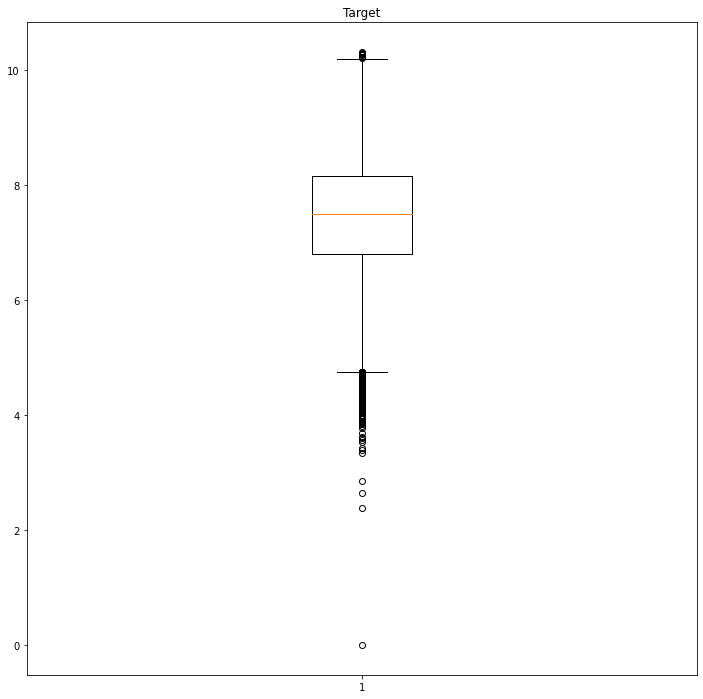

In [131]:
plt.figure(figsize = (12,12))
plt.boxplot(target,showcaps = True,showfliers = True)
plt.title("Target");

In [142]:
# to find the outlier locations in the target variable
z = np.abs(stats.zscore(target))
np.where(z>3)

(array([   139,   1228,   2856,   3111,   3166,   3338,   3882,   7216,
         7346,   8261,   8737,  10124,  10379,  12765,  13285,  14050,
        14336,  15526,  15727,  15839,  15932,  16051,  17378,  18100,
        18599,  18878,  20502,  20832,  21591,  22842,  25434,  25578,
        26076,  26147,  27258,  27581,  28592,  28924,  30186,  30495,
        30573,  30808,  31009,  31145,  31575,  32566,  33790,  34609,
        34982,  35828,  36276,  37006,  37562,  38874,  39092,  39436,
        39579,  39834,  41524,  41939,  42269,  42398,  42844,  44020,
        44166,  44214,  44233,  46155,  47006,  47354,  47557,  48736,
        49563,  49744,  51184,  51433,  52098,  53789,  54745,  56995,
        57148,  57226,  61283,  61413,  63128,  64187,  64305,  65264,
        65272,  66365,  66674,  67005,  67434,  69096,  70048,  70384,
        70841,  71254,  71376,  72121,  72329,  72560,  72833,  74202,
        74220,  75494,  75946,  76347,  78651,  79349,  81306,  81971,
     

In [32]:
target.describe()

count    300000.000000
mean          7.456260
std           0.887295
min           0.000000
25%           6.798341
50%           7.496503
75%           8.161166
max          10.309208
Name: target, dtype: float64

In [134]:
#selecting the numerical variables
n = train.select_dtypes(exclude = "object").columns.tolist()
n.remove("id")
n.remove("target")

In [135]:
numerical_columns = train[n]

In [136]:
numerical_columns.describe()

,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13
count,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000
mean,0.524634,0.506649,0.444115,0.446214,0.455471,0.508337,0.478345,0.455904,0.459321,0.526899,0.504943,0.529938,0.524549,0.503349
std,0.204875,0.235269,0.200089,0.238669,0.200695,0.231612,0.192432,0.204493,0.220642,0.204025,0.201549,0.230860,0.220892,0.225218
min,-0.093505,-0.055105,-0.060274,0.134760,0.189216,-0.087247,0.043953,0.208703,0.004041,0.073040,0.059644,0.064161,-0.005600,0.158121
25%,0.370451,0.352307,0.314121,0.214572,0.279853,0.338747,0.339896,0.278041,0.308655,0.361957,0.338898,0.316662,0.332143,0.291289
50%,0.492208,0.615156,0.457271,0.377823,0.411351,0.441384,0.410090,0.360736,0.425801,0.488867,0.519855,0.558827,0.407365,0.433909
75%,0.654793,0.688150,0.554835,0.719758,0.621808,0.709515,0.604246,0.639388,0.541525,0.752765,0.672809,0.720381,0.732431,0.730870
max,1.052666,0.851746,1.017689,1.006469,0.994050,1.044433,1.093312,1.036541,1.014156,0.972091,1.029773,1.038049,0.961370,0.873579


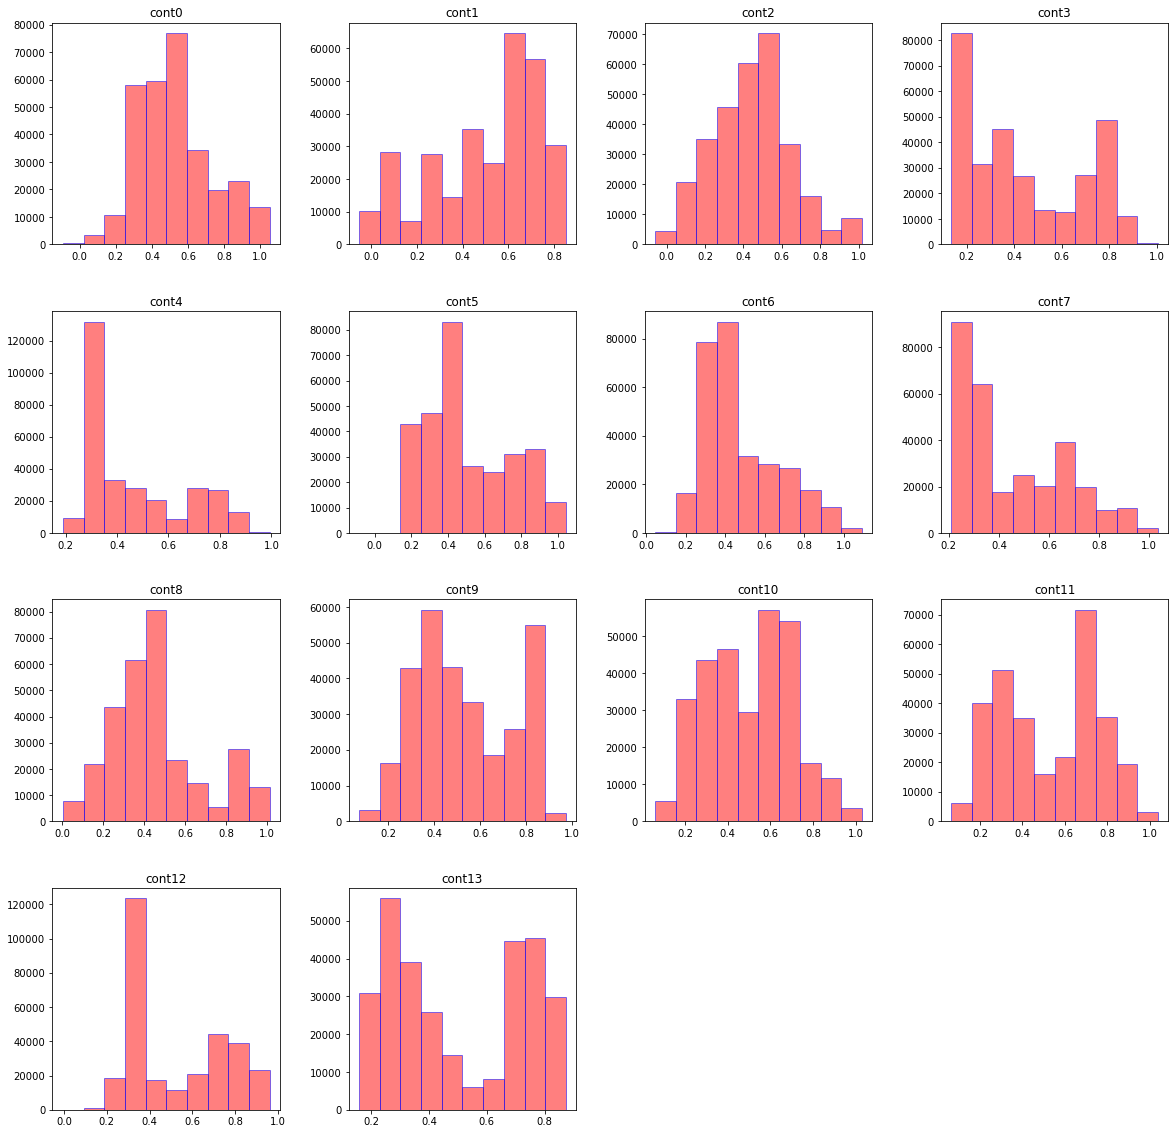

In [138]:
numerical_columns.hist(figsize=((20,20)), alpha=0.5, animated=True, edgecolor='blue', color='red', grid=False);

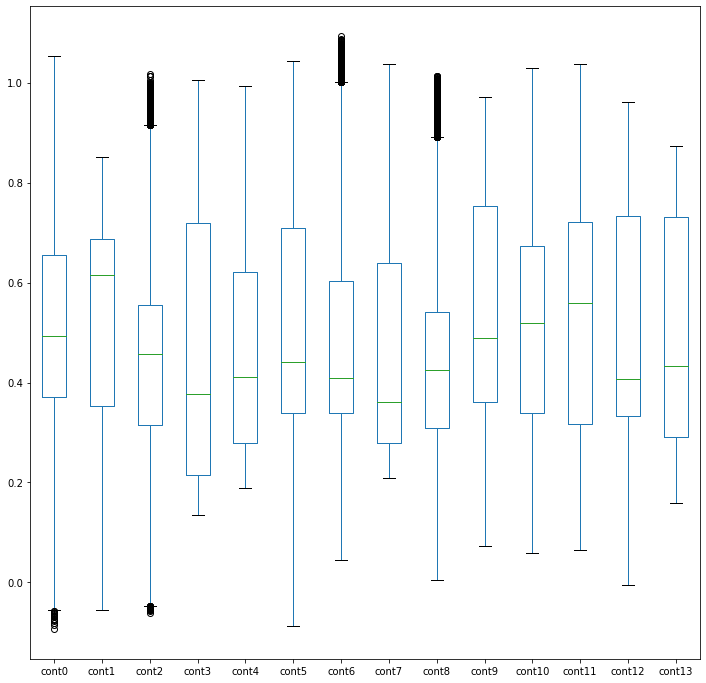

In [139]:
#to find outliers in the numerical variables
numerical_columns.boxplot(showcaps = True,showfliers = True,figsize = (12,12),grid = False); 

In [111]:
#to find an outlier in a variable, eg. cont8

from scipy import stats

z = np.abs(stats.zscore(numerical_columns['cont0']))
print(z)
print(np.where(z > 3)) # to locate values outside 3-sigma

[1.94537248 0.42468212 1.01318131 ... 0.88726693 0.36495082 0.24006268]
(array([132579]),)


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


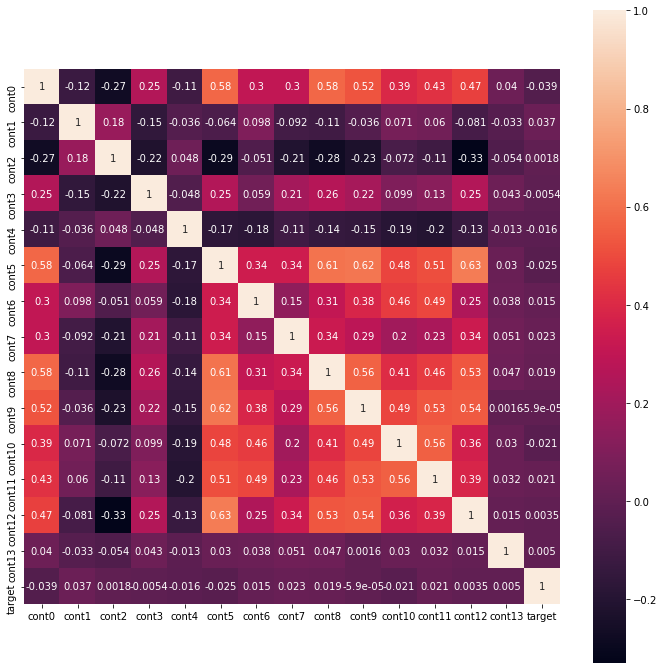

In [116]:
numerical_columns["target"] = train["target"]
c = numerical_columns.corr()
plt.figure(figsize = (12,12))
sns.heatmap(c,square = True,annot=True);

In [118]:
#to get the highest correlated variables with the target in the data

abs(c["target"]).sort_values(ascending=False)

target    1.000000
cont0     0.039217
cont1     0.036767
cont5     0.025329
cont7     0.023479
cont10    0.021051
cont11    0.020685
cont8     0.019246
cont4     0.015908
cont6     0.015015
cont3     0.005414
cont13    0.004975
cont12    0.003545
cont2     0.001806
cont9     0.000059
Name: target, dtype: float64

In [164]:
category = train.select_dtypes(exclude = "number").columns.tolist()

In [165]:
categorical_columns = train[category]

In [166]:
categorical_columns.head(5)

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9
0,A,B,A,A,B,D,A,E,C,I
1,B,A,A,A,B,B,A,E,A,F
2,A,A,A,C,B,D,A,B,C,N
3,A,A,A,C,B,D,A,E,G,K
4,A,B,A,A,B,B,A,E,C,F


In [167]:
categorical_columns.describe()

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9
count,300000,300000,300000,300000,300000,300000,300000,300000,300000,300000
unique,2,2,2,4,4,4,8,8,7,15
top,A,A,A,C,B,B,A,E,C,F
freq,281471,162678,276551,183752,297373,149208,292643,267631,121054,107281


In [168]:
categorical_columns.shape

(300000, 10)

In [ ]:
# we can start getting dummies for categorical variables from pd.get_dummies or one hot encoder or other encoders 
#to model the data